In [ ]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Dataset overview

##Load the dataset

In [ ]:
# Read the data
day = pd.read_csv('sample_data/day.csv', parse_dates=True, index_col='dteday')
hour = pd.read_csv('sample_data/hour.csv', parse_dates=True, index_col='dteday')

## Shape of data

In [ ]:
print('Shape of data: ', day.shape)
print('Shape of data: ', hour.shape)

##First few obsevations

In [ ]:
day.head()

In [ ]:
hour.head()

##Feature Data Types

In [ ]:
day.info()

In [ ]:
hour.info()

## Feature Statistics Summary

In [ ]:
day.describe()

In [ ]:
hour.describe()

## Looking for Missing Data fields

In [ ]:
day.isnull().sum()

In [ ]:
hour.isnull().sum()

## Renaming columns into readable names and adding weekday names

In [ ]:
#renaming columns into readable names and adding weekday names
day.rename(columns = {'yr':'year', 'mnth':'month', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'}, inplace = True)
hour.rename(columns = {'yr':'year', 'hr':'hour', 'mnth':'month', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'}, inplace = True)
day.index.names = ['date']
hour.index.names = ['date']
day['dayname']=day.index.day_name()
hour['dayname']=hour.index.day_name()

## Categorical data conversion

In [ ]:
# Converting into categorical data
category_list = ['weekday', 'season', 'holiday', 'workingday', 'weather']
for var in category_list:
    day[var] = day[var].astype('category')
    hour[var] = hour[var].astype('category')

Un-normalising temp, atemp, humidity and windspeed columns

In [ ]:
day['temp']=day['temp']*41
hour['temp']=hour['temp']*41
day['atemp']=day['atemp']*50
hour['atemp']=hour['atemp']*50
day['humidity']=day['humidity']*100
hour['humidity']=hour['humidity']*100
day['windspeed']=day['windspeed']*67
hour['windspeed']=hour['windspeed']*67

# EDA

## Count vs. Weather, Season, Working Day, Holiday

In [ ]:
# Average values across each of the categorical columns 
sns.set_palette('plasma')
fig = plt.figure(figsize=(17, 12))
axes = fig.add_subplot(2, 2, 1)
grp_weather = pd.DataFrame(day.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(x='weather', y='count',data=grp_weather,  ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
grp_season = pd.DataFrame(day.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(x='season', y='count',data=grp_season,  ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
grp_workingday = pd.DataFrame(day.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(x='workingday', y='count',data=grp_workingday,  ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
grp_season = pd.DataFrame(day.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(x='holiday', y='count',data=grp_season,  ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')

plt.show()

## Number of bikes rented vs. the temperature

In [ ]:
# Splitting data into working-day and non-working day
fig = plt.figure(figsize=(17, 12))
day_w = day[day.workingday==1]
day_nw = day[day.workingday==0]
bin_size=4
fig = plt.figure(figsize=(18, 6))

axes = fig.add_subplot(1, 2, 1)
day_w['temp_round']= day_w['temp']//bin_size
sns.barplot(x='temp_round', y='count', data=day_w, palette='winter')
plt.xlabel('temp bins')
plt.ylabel('Count')
plt.title('Working Days: Count given across temperature range')
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(int(max(day_w['temp_round'])+1))]
plt.xticks(np.arange(min(day_w['temp_round']), max(day_w['temp_round'])+1),
          labels_w, rotation=90 )

axes = fig.add_subplot(1, 2, 2)
day_nw['temp_round']= day_nw['temp']//bin_size
sns.barplot(x='temp_round', y='count', data=day_nw, palette='winter')
plt.xlabel('temp bins')
plt.ylabel('Count')
plt.title('Non Working Days: Count given across temperature range')
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(int(max(day_nw['temp_round'])+1))]
plt.xticks(np.arange(min(day_nw['temp_round']), max(day_nw['temp_round'])+1),
          labels_nw, rotation=90 )

plt.show()

There is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature bin

## Hourly Distribution

In [ ]:
sns.set_palette('gnuplot2')
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 8))
sns.pointplot(x='hour', y='count', data=hour, hue='dayname', legend=True)
plt.xlabel('Hour in the day')
plt.ylabel('Count')
plt.title('Average Bike Rentals by the day across Weekdays')

plt.show()


## Monthly Distribution

In [ ]:
# Average Monthly Count Distribution plot
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(17, 6))

sns.barplot(data=day, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

In [ ]:
data = day.groupby(by= 'month')['count'].mean()
plt.figure(figsize=(8,5))
density = sns.barplot(x=data.index, y=data.values)
title = plt.title('Average rental count vs month', fontdict={'fontsize': 20})
plt.xlabel('Month')
plt.ylabel('Avg Rental count')
plt.show()

In [ ]:
_,ax=plt.subplots(figsize=(15,8))
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='count',data=hour,hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

## Yearly Distribution

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='count',data=day)
ax.set_title('Yearly distribution of counts')
plt.show()

## Regression Plots

In [ ]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(17, 7))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(x='temp', y='count', data=hour, ax=axes, color='C1')
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(x='humidity', y='count', data=hour, ax=axes, color='C2')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(x='windspeed', y='count', data=hour, ax=axes, color='C3')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

## Correlation Analysis

In [ ]:
# Heatmap relative to all numeric columns
corr_matrix = hour[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
mask=np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask= mask, cmap='YlGnBu', annot=True, vmin=-1)
plt.show()

# Time Series Analysis

## Seasonal Decompose and Test for Stationarity

In [ ]:
#seasonal_decompose on hour dataset
from statsmodels.tsa.seasonal import seasonal_decompose
df=hour['count']
df.head()
decompose_result = seasonal_decompose(df, model="multiplicative", period=24, extrapolate_trend='freq')
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid


fig= decompose_result.plot()
fig.set_size_inches((10, 7))

In [ ]:
# Dickey Fuller test for stationarity: hour data
from statsmodels.tsa.stattools import adfuller
X = hour['count']
result = adfuller(X, autolag='AIC')
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Stationary")

In [ ]:
# Dickey Fuller test for stationarity: deseasonalized hour data
deseasonalized=hour['count']/seasonal
X = deseasonalized
result = adfuller(X, autolag='AIC')
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Stationary")

In [ ]:
# Dickey Fuller test for stationarity: residual for hour data
X = residual
result = adfuller(X, autolag='AIC')
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Stationary")

In [ ]:
#seasonal_decompose on day dataset
from statsmodels.tsa.seasonal import seasonal_decompose
df=day['count']
decompose_result = seasonal_decompose(df, model="multiplicative",period = 24, extrapolate_trend='freq')
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid


fig= decompose_result.plot()
fig.set_size_inches((10, 7))

In [ ]:
# Dickey Fuller test for stationarity: residual for day data
from statsmodels.tsa.stattools import adfuller
X = residual
result = adfuller(X, autolag='AIC')
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Stationary")

# OLS Model Fitting

## Model Fitting


In [ ]:
#Combining date and time columns to create unique indices and preserve hour data
hour=hour.reset_index()
hour['date']=pd.to_datetime(hour.date) + pd.to_timedelta(hour.hour, unit='h')
hour=hour.set_index('date')

In [ ]:
hour_ols= hour.drop(['instant', 'year', 'month', 'hour', 'casual', 'registered', 'dayname'], axis=1)
day = day.drop(['instant', 'year', 'month', 'casual', 'registered', 'dayname'], axis=1)

### Correlation among Categorical variables

In [ ]:
data=day.drop(['atemp', 'temp', 'humidity', 'windspeed', 'count'], axis=1)

In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

data_encoded.head()

In [ ]:
# Building of the Cramer's V function
from scipy.stats import chi2_contingency

def cramers_V(v1,v2) :
  crosstab =np.array(pd.crosstab(v1,v2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [ ]:
# Building of the matrix
rows= []

for v1 in data_encoded:
  col = []
  for v2 in data_encoded :
    cramers =cramers_V(data_encoded[v1], data_encoded[v2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

Weekday and workingday variables have high correlation.So we need to drop one. We drop weekday variable as it would produce 6 dummy variables and hence increase the number of regressors which in turn would lessen the degrees of freedom and increase the SSE

In [ ]:
day_ols=day.drop('weekday', axis=1)

### Removing Multicollinearity

In [ ]:
X=day_ols[['atemp', 'temp', 'humidity', 'windspeed']]
Xc=sm.add_constant(X)
y = day_ols['count']
model1 = sm.OLS(y, Xc).fit()
print(model1.summary())

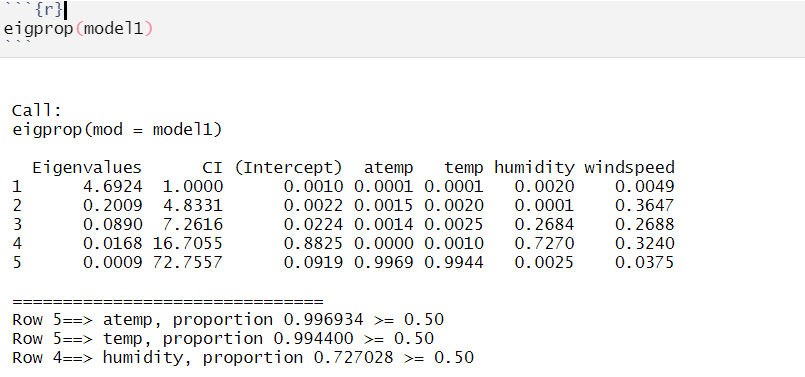

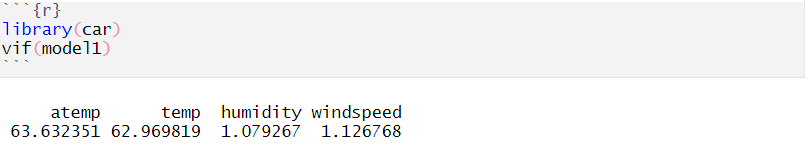

 

*   Here atemp has the highest VIFs in the  subset (atemp,temp) and are involved in multicollinearity.
*   We remove atemp and again fit the model .

In [ ]:
X=day_ols[['temp', 'humidity', 'windspeed']]
Xc=sm.add_constant(X)
y = day_ols['count']
model2 = sm.OLS(y, Xc).fit()
print(model2.summary())

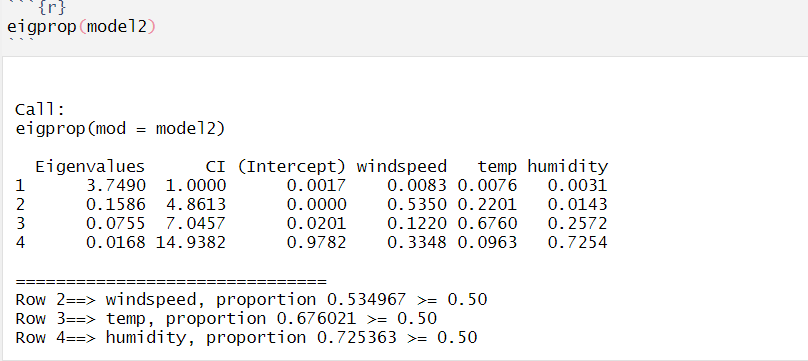

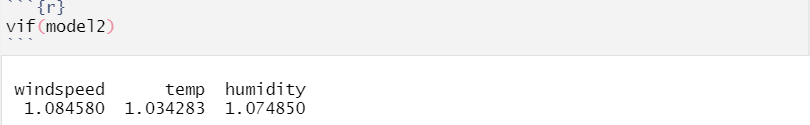

All VIFs less than 5. No multicollinearity.

In [ ]:
day_ols=day_ols.drop('atemp', axis=1)

### Outlier Detection: Leverage and Influential Points

In [ ]:
day_ols = pd.get_dummies(day_ols, columns=['season','holiday','workingday','weather'], drop_first=True)
hour_ols = pd.get_dummies(hour_ols, columns=['season','holiday','workingday','weather'], drop_first=True)

In [ ]:
# Create a training and test split for hour data
X=hour_ols.drop('count',axis=1)
y = hour_ols['count']
X_train = X['2011-01-01 00:00:00':'2012-08-07 10:00:00']
X_test = X['2012-08-07 11:00:00':'2012-12-31 23:00:00']
y_train = y['2011-01-01 00:00:00':'2012-08-07 10:00:00']
#y_test = y.drop(y_train.index, inplace=True)
y_test = y['2012-08-07 11:00:00':'2012-12-31 23:00:00']

In [ ]:
Xc=sm.add_constant(X_train)
model = sm.OLS(y_train, Xc).fit()
print(model.summary())

In [ ]:
# Create a training and test split for day data
X = day_ols.drop('count',axis=1)
y = day_ols['count']
X_train = X['2011-01-01':'2012-08-06']
X_test = X['2012-08-07':'2012-12-31']
y_train = y['2011-01-01':'2012-08-06']
#y_test = y.drop(y_train.index, inplace=True)
y_test = y['2012-08-07':'2012-12-31']

In [ ]:
Xc=sm.add_constant(X_train)
model3 = sm.OLS(y_train, Xc).fit()
print(model3.summary())

In [ ]:
# Getting Cook's Distance for each point
influence = model3.get_influence()
influence_list = influence.cooks_distance[0]
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = X_train.index
data=X_train
data['count']=y_train
cooks_df = data.merge(influence_df, left_index=True, right_index=True)

In [ ]:
# Setting the threshold and getting the outliers
cooks_threshold = 4/584
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
cooks_df.drop(cooks_outliers.index, inplace=True)
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / 584 * 100:.3}% of our dataset")

In [ ]:
X_train=cooks_df.drop(['count', 'influence'], axis=1)
y_train=cooks_df['count']

In [ ]:
Xc=sm.add_constant(X_train)
model4 = sm.OLS(y_train, Xc).fit()
print(model4.summary())

### Normality Test of Errors

In [ ]:
import scipy.stats as stats
sm.qqplot(model4.resid,line='45',fit=True,dist=stats.norm)
plt.show()

In [ ]:
#Histogram approach of normality checking
_, bins, _ = plt.hist(model4.resid,density=1,alpha=0.5,ec='k')
plt.xlabel('Residuals')
mu, sigma = stats.norm.fit(model4.resid)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(model4.resid)
print(f"shapiro statistic: {stat}")
print(f"p-value: {p}")

In [ ]:
from scipy import stats
fitted_data, lmbda = stats.boxcox(y_train)
Xc=sm.add_constant(X_train)
model5= sm.OLS(fitted_data,Xc).fit()
print(model5.summary())

### Homoscedasticity of errors

In [ ]:
dataframe=pd.concat([X_train,y_train],axis=1)
model_fitted_Y = model5.fittedvalues
model_residuals = model5.resid # model residuals

In [ ]:
#Residual vs Fitted Plot
plot_1 = plt.figure()
plot_1.axes[0] = sns.residplot(model_fitted_Y,dataframe.columns[-1],data=dataframe, lowess=True,
                 scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_1.axes[0].set_title('Residuals vs Fitted')
plot_1.axes[0].set_xlabel('Fitted values')
plot_1.axes[0].set_ylabel('Residuals')

In [ ]:
#from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model5.resid, model5.model.exog)
if test[1]<0.05:
  print('Homoscedasticiy is not present')
else:
  print('Homoscedasticiy is present')

#lzip(names, test)

### Variable Selection

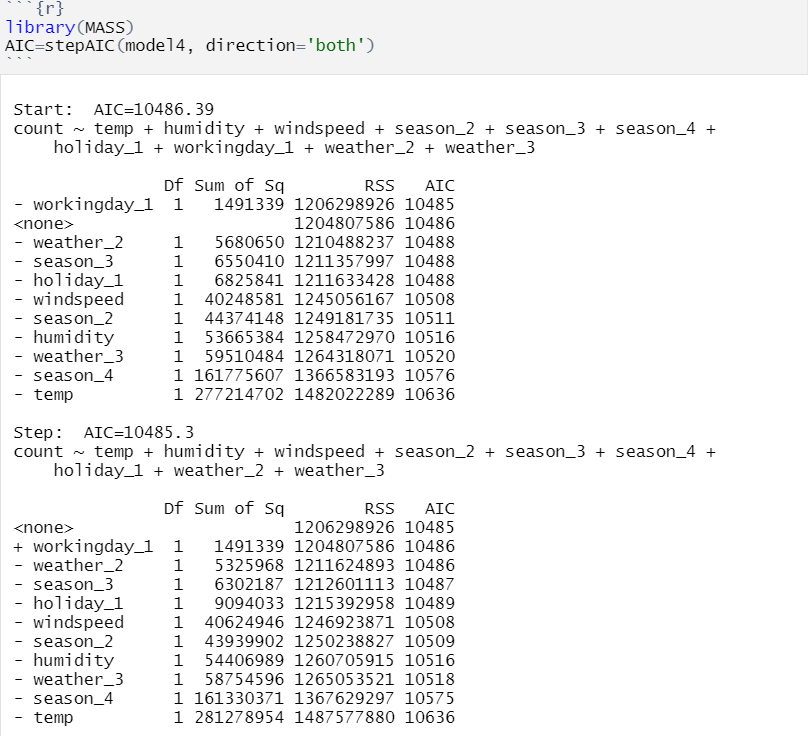

In [ ]:
day_ols=day_ols.drop(['workingday_1'], axis=1)

### HAC robust MLR Model

In [ ]:
fitted_data, fitted_lambda = stats.boxcox(y_train)
Xc=sm.add_constant(X_train)
model6= sm.OLS(fitted_data,Xc).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(model6.summary())

## Predictions

In [ ]:
from scipy.special import inv_boxcox
Xc=sm.add_constant(X_test)
predictions = model6.predict(Xc)
y_pred = inv_boxcox(predictions, lmbda)
y_pred=np.around(y_pred)
y_pred=y_pred.astype(int)

In [ ]:
#visualizing predicted values
y_pred

In [ ]:
# error metrices

In [ ]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
#Defining MADP function
def MADP(Y_actual,Y_Predicted):
  madp = (np.mean(np.abs(Y_actual - Y_Predicted))/np.mean(Y_actual))*100
  return madp

In [ ]:
#Defining CERRPCT function
def CERRPCT(Y_actual,Y_Predicted):
  cerrpct = (np.mean(Y_actual - Y_Predicted)/np.mean(Y_actual))*100
  return cerrpct

In [ ]:
MAPE(y_test, y_pred)

In [ ]:
MADP(y_test, y_pred)

In [ ]:
CERRPCT(y_test, y_pred)

# Ridge Regression

## Model fitting

In [ ]:
day_ridge = pd.get_dummies(day, columns=['season','holiday','workingday','weather'], drop_first=True)

In [ ]:
# Create a training and test split for day data
X = day_ridge.drop('count',axis=1)
y = day_ridge['count']
X_train = X['2011-01-01':'2012-08-06']
X_test = X['2012-08-07':'2012-12-31']
y_train = y['2011-01-01':'2012-08-06']
#y_test = y.drop(y_train.index, inplace=True)
y_test = y['2012-08-07':'2012-12-31']

In [ ]:
data=X_train
data['count']=y_train
cooks_df = data.merge(influence_df, left_index=True, right_index=True)

In [ ]:
# Setting the threshold and getting the outliers
cooks_threshold = 4/584
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
cooks_df.drop(cooks_outliers.index, inplace=True)
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / 584 * 100:.3}% of our dataset")

In [ ]:
X_train=cooks_df.drop(['count', 'influence'], axis=1)
y_train=cooks_df['count']

In [ ]:
# fitting rigde model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': (np.logspace(-8, 8, 1000))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_cv = GridSearchCV(ridge, param_grid, cv=10)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

## Predictions

In [ ]:
# Calculate the predicted value for training and test dataset
from sklearn.metrics import r2_score

y_train_pred = ridge_cv.predict(X_train)
y_test_pred = ridge_cv.predict(X_test)
print('R^2 : %.3f' % (r2_score(y_train, y_train_pred)))

In [ ]:
y_test=y_test.to_frame()

In [ ]:
y_test['Predictions']=y_test_pred
y_test['Predictions']

In [ ]:
y_pred=np.around(y_test_pred)
y_pred=y_pred.astype(int)

In [ ]:
#Calculating error matrices

In [ ]:
MAPE(y_test, y_pred)

In [ ]:
MADP(y_test, y_pred)

In [ ]:
CERRPCT(y_test, y_pred)